In [3]:
import pandas as pd
from bloxs import B
from IPython.display import HTML
import plotly.express as px

In [4]:
df = pd.read_csv('douban.csv', index_col=False)

In [5]:
# 译者为空表明是中文作品，也可能是不知道的译者，大约差不多
chinese_book = df[df.iloc[:,3].isnull()==True].count()[0]
d = { "中文": chinese_book, "译文": 250 - chinese_book}
s_by_lang = pd.Series(d)

# 豆瓣图书排名分析

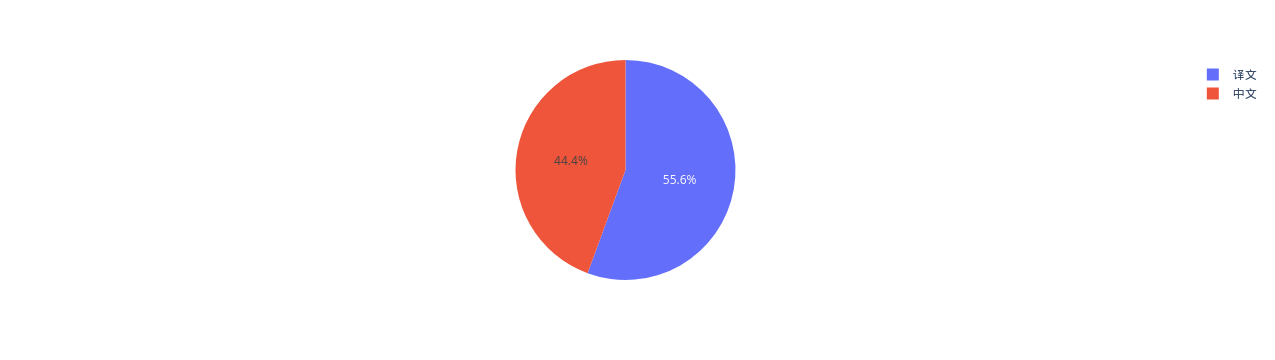

In [6]:
fig = px.pie(s_by_lang, values=s_by_lang.values, names=s_by_lang.index)
fig.show()

In [7]:
temp = df.groupby('作者').count().iloc[:,0].sort_values(ascending=0)
by_author = temp.to_frame().reset_index()
by_author.insert(0,'作者排名',list(by_author.index + 1))

In [26]:
by_country_string = df.groupby('country').count().iloc[:,1].sort_values()[:-1]

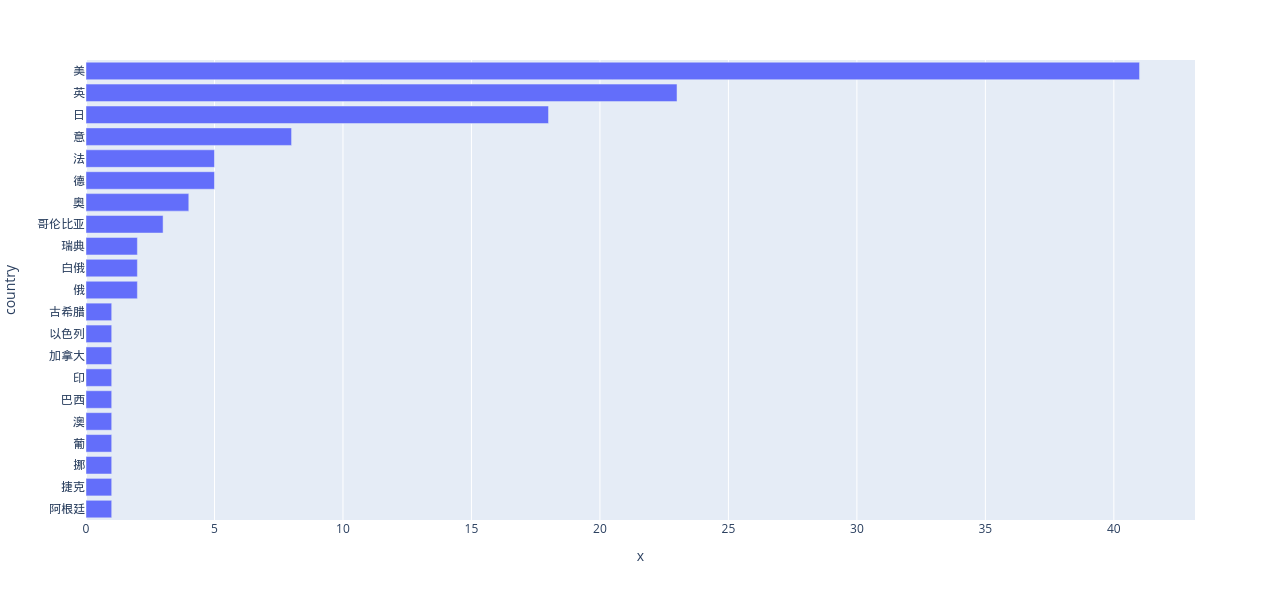

In [29]:
fig = px.bar(by_country_string, x=by_country_string.values, y=by_country_string.index, height=600)

fig.show()

In [8]:
by_author.head(31).style.hide(axis='index')

作者排名,作者,序号
1,三毛,7
2,金庸,6
3,张爱玲,5
4,鲁迅,5
5,王小波,5
6,[奥] 斯蒂芬·茨威格,4
7,[日] 东野圭吾,4
8,龙应台,4
9,林达,4
10,[意] 埃莱娜·费兰特,4


In [9]:
%%html
<html>
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-GLhlTQ8iRABdZLl6O3oVMWSktQOp6b7In1Zl3/Jr59b6EGGoI1aFkw7cmDA6j6gD" crossorigin="anonymous">
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha1/dist/js/bootstrap.bundle.min.js" integrity="sha384-/mhDoLbDldZc3qpsJHpLogda//BVZbgYuw6kof4u2FrCedxOtgRZDTHgHUhOCVim" crossorigin="anonymous"></script>
</html>

In [11]:
by_author_sum = by_author.groupby('序号').count()

In [12]:
by_author_sum['card'] = [f'''
<div class="card text-center">
  <div class="h3 card-header bg-primary">
    上榜{num}部
  </div>
  <div class="card-body bg-secondary">
    <p class="text-center display-4">{writer}<br>人</p>
  </div>
</div> 
''' for num, writer in zip(by_author_sum.index, by_author_sum['作者'])]

In [16]:
ss2 = '<div class="card-group">'+''.join(list(by_author_sum.sort_index(ascending= False).iloc[:,2]))+'</div>'

In [17]:
HTML(ss2)

# 把前几名的作品显示出来


In [18]:
top10 = by_author.head(10).copy()

top10['wcard'] = [f'''
<div class="card text-center" >
  <div class="card-body bg-secondary">
    <h1 class="card-title">{author}</h1>
    <h3 class="card-text text-center">上榜{bknum}部作品</h3>
    <a href="#" class="btn btn-primary">作家榜第{rank}名</a>
  </div>
</div>
''' for author, bknum, rank in zip( top10['作者'], top10['序号'], top10['作者排名'])]

bclist = []
for i in list(top10['作者']):
    s = '<div class="card-group">'+''.join(list(df[df['作者']==i]['bcard2']))+'</div>'
    bclist.append(s)
    
top10['bcard'] = bclist

top10['show'] = top10['wcard'] + top10['bcard']

In [19]:
HTML(top10['show'][0])

In [21]:
HTML(top10['show'][1])

In [22]:
HTML(top10['show'][2])

In [23]:
HTML(top10['show'][3])

In [24]:
HTML(top10['show'][4])

In [25]:
HTML(top10['show'][5])